# E-commerce Sales EDA (My Little Data Project)

Today I’m going to explore a dataset about e-commerce orders.

I want to understand a few simple things:
- What do people buy the most?
- Which category makes the most sales?
- Which region makes the most profit?
- Does sales go up or down over time?

I’m going to go step by step, like a journey.


## loading the data

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("ecommerce_sales_data.csv")

df.shape


(3500, 7)

In [3]:
df.columns

Index(['Order Date', 'Product Name', 'Category', 'Region', 'Quantity', 'Sales',
       'Profit'],
      dtype='object')

In [4]:
df.head()


,Order Date,Product Name,Category,Region,Quantity,Sales,Profit
0,2024-12-31,Printer,Office,North,4,3640,348.93
1,2022-11-27,Mouse,Accessories,East,7,1197,106.53
2,2022-05-11,Tablet,Electronics,South,5,5865,502.73
3,2024-03-16,Mouse,Accessories,South,2,786,202.87
4,2022-09-10,Mouse,Accessories,West,1,509,103.28


## Now I'll check the “Data quality (health)” of the dataset

I want to check:
- Are there missing values?
- Are there duplicates?
- Do the data types look correct?

If something looks weird, I’ll write it down in mardown cells


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    3500 non-null   object 
 1   Product Name  3500 non-null   object 
 2   Category      3500 non-null   object 
 3   Region        3500 non-null   object 
 4   Quantity      3500 non-null   int64  
 5   Sales         3500 non-null   int64  
 6   Profit        3500 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 191.5+ KB


In [6]:
df.isna().sum().sort_values(ascending=False)


Order Date      0
Product Name    0
Category        0
Region          0
Quantity        0
Sales           0
Profit          0
dtype: int64

In [7]:
df.duplicated().sum()


np.int64(0)

## fixing one important thing (Order Date)

Dates are special.
If I want to make a time chart (like sales per month), I need the date column to be a real date type.

This is not deep “cleaning”. This is just making the data usable for graphs.


In [8]:
df["Order Date"] = pd.to_datetime(df["Order Date"], errors="coerce")

print("Date range:")
print("Start:", df["Order Date"].min())
print("End:  ", df["Order Date"].max())


Date range:
Start: 2022-01-01 00:00:00
End:   2024-12-31 00:00:00


## now i ll  do quick summary stats

Like:
- average sales
- min and max
- typical profit



In [9]:
df.describe()

,Order Date,Quantity,Sales,Profit
count,3500,3500.000000,3500.000000,3500.000000
mean,2023-07-13 00:53:53.828571648,4.931714,3047.966000,527.047203
min,2022-01-01 00:00:00,1.000000,51.000000,6.970000
25%,2022-10-16 18:00:00,3.000000,1049.500000,158.695000
50%,2023-07-21 12:00:00,5.000000,2350.500000,361.070000
75%,2024-04-16 06:00:00,7.000000,4537.000000,729.125000
max,2024-12-31 00:00:00,9.000000,10782.000000,2946.930000
std,NaN,2.575895,2440.213237,504.139732


## Creating a few extra helpful columns

- Profit Margin = Profit / Sales (how much profit per dollar of sales)
- Unit Price (roughly) = Sales / Quantity (about how much each item costs)
- Year and Month from the date (so I can group over time)


In [10]:
df["Profit Margin"] = df["Profit"] / df["Sales"]
df["Unit Price (approx)"] = df["Sales"] / df["Quantity"]

df["Year"] = df["Order Date"].dt.year
df["Month"] = df["Order Date"].dt.month
df["Year-Month"] = df["Order Date"].dt.to_period("M").astype(str)

df.head()


,Order Date,Product Name,Category,Region,Quantity,Sales,Profit,Profit Margin,Unit Price (approx),Year,Month,Year-Month
0,2024-12-31,Printer,Office,North,4,3640,348.93,0.095860,910.0,2024,12,2024-12
1,2022-11-27,Mouse,Accessories,East,7,1197,106.53,0.088997,171.0,2022,11,2022-11
2,2022-05-11,Tablet,Electronics,South,5,5865,502.73,0.085717,1173.0,2022,5,2022-05
3,2024-03-16,Mouse,Accessories,South,2,786,202.87,0.258104,393.0,2024,3,2024-03
4,2022-09-10,Mouse,Accessories,West,1,509,103.28,0.202908,509.0,2022,9,2022-09


## I look at the dataset like a story

Before charts, I want to ask:

What categories exist? OR  What products exist? OR What regions exist?

This helps me understand the “world” inside the dataset.


In [11]:
df["Category"].value_counts()


Category
Electronics    1742
Accessories    1401
Office          357
Name: count, dtype: int64

In [12]:
df["Region"].value_counts()


Region
West     898
South    883
East     861
North    858
Name: count, dtype: int64

In [13]:
df["Product Name"].value_counts()


Product Name
Monitor       364
Camera        363
Smartwatch    363
Printer       357
Keyboard      351
Tablet        350
Mouse         347
Headphones    339
Laptop        336
Smartphone    330
Name: count, dtype: int64

# Graph Time!

well im gonna check :

- Is sales usually small or big?
- Are there a few huge orders?
- Which categories and regions win?


## Graph 1: Sales distribution

This shows me if most sales are small, or if there are many big orders.


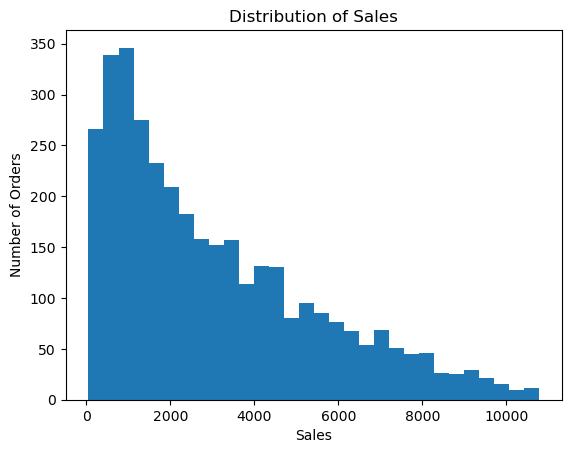

In [14]:
plt.figure()
df["Sales"].plot(kind="hist", bins=30)
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Number of Orders")
plt.show()


## Graph 2: Profit distribution

This shows how profit is spread out.
I also want to see if profit is ever negative (loss).


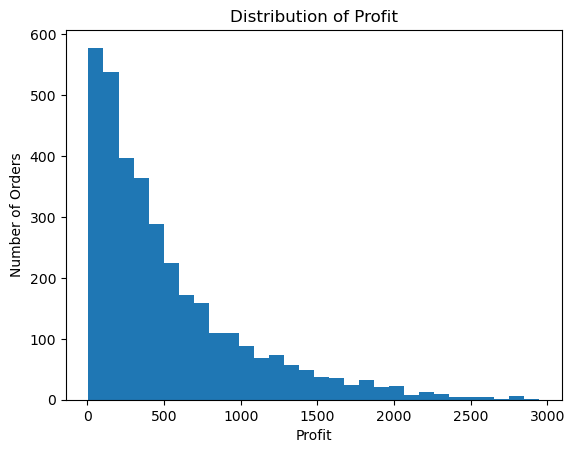

Min profit: 6.97
Number of negative profit rows: 0


In [15]:
plt.figure()
df["Profit"].plot(kind="hist", bins=30)
plt.title("Distribution of Profit")
plt.xlabel("Profit")
plt.ylabel("Number of Orders")
plt.show()

print("Min profit:", df["Profit"].min())
print("Number of negative profit rows:", (df["Profit"] < 0).sum())


## Graph 3: Total Sales by Category

This tells me which category makes the most money.


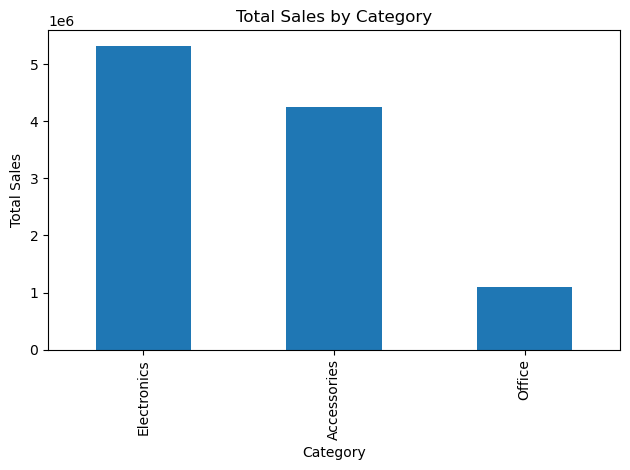

Category
Electronics    5326074
Accessories    4247591
Office         1094216
Name: Sales, dtype: int64

In [16]:
sales_by_category = df.groupby("Category")["Sales"].sum().sort_values(ascending=False)

plt.figure()
sales_by_category.plot(kind="bar")
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

sales_by_category


## Graph 4: Total Profit by Region

This tells me which region is the best for profit.


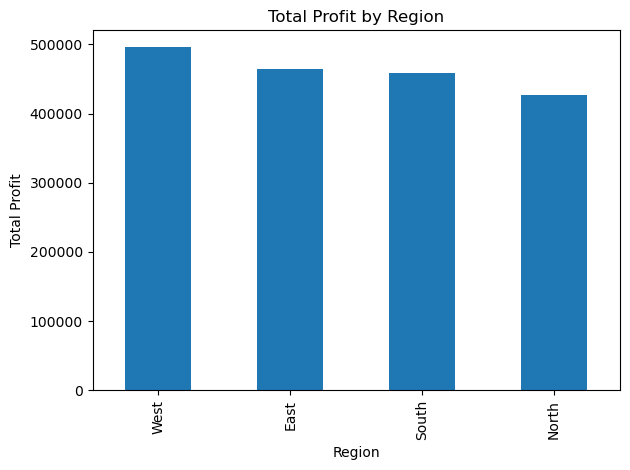

Region
West     495358.73
East     464888.46
South    458103.27
North    426314.75
Name: Profit, dtype: float64

In [17]:
profit_by_region = df.groupby("Region")["Profit"].sum().sort_values(ascending=False)

plt.figure()
profit_by_region.plot(kind="bar")
plt.title("Total Profit by Region")
plt.xlabel("Region")
plt.ylabel("Total Profit")
plt.tight_layout()
plt.show()

profit_by_region


## Graph 5: Profit vs Sales (scatter plot)

Each dot is an order.

This helps me see:
- Do bigger sales usually mean bigger profit?
- Are there weird points that don’t fit the pattern?


<Figure size 640x480 with 0 Axes>

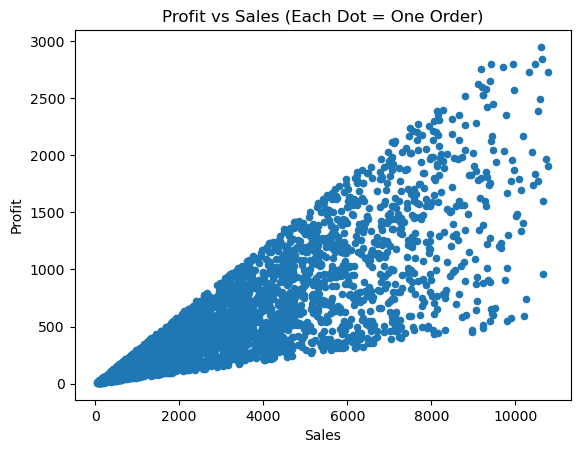

In [18]:
plt.figure()
df.plot(kind="scatter", x="Sales", y="Profit")
plt.title("Profit vs Sales (Each Dot = One Order)")
plt.show()


## Graph 6: Monthly Sales Trend

Now I group sales by month.

This helps me see if the business is growing or slowing down.


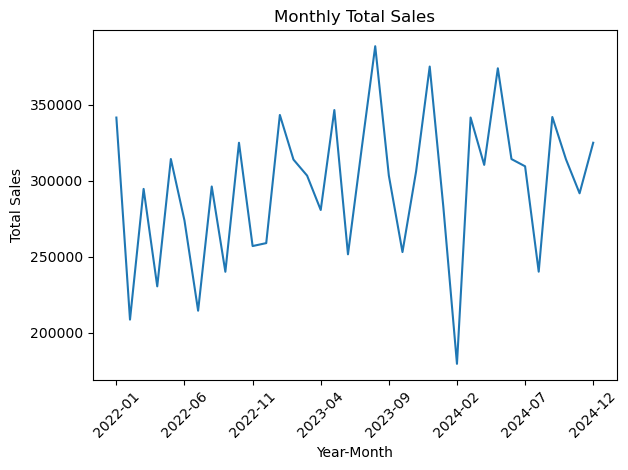

In [19]:
monthly_sales = df.groupby("Year-Month")["Sales"].sum()

plt.figure()
monthly_sales.plot()
plt.title("Monthly Total Sales")
plt.xlabel("Year-Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



##  Top Products

Now I want to know which product names bring in the most sales and profit.


In [20]:
top_products_sales = df.groupby("Product Name")["Sales"].sum().sort_values(ascending=False).head(10)
top_products_profit = df.groupby("Product Name")["Profit"].sum().sort_values(ascending=False).head(10)

top_products_sales, top_products_profit


(Product Name
 Camera        1177381
 Monitor       1160048
 Printer       1094216
 Mouse         1074398
 Smartphone    1069681
 Smartwatch    1049211
 Keyboard      1024507
 Tablet        1023928
 Laptop        1005873
 Headphones     988638
 Name: Sales, dtype: int64,
 Product Name
 Camera        207630.99
 Monitor       202028.17
 Mouse         185763.69
 Laptop        185756.81
 Printer       185394.88
 Smartphone    183296.97
 Smartwatch    178995.81
 Keyboard      175814.68
 Headphones    172478.20
 Tablet        167505.01
 Name: Profit, dtype: float64)

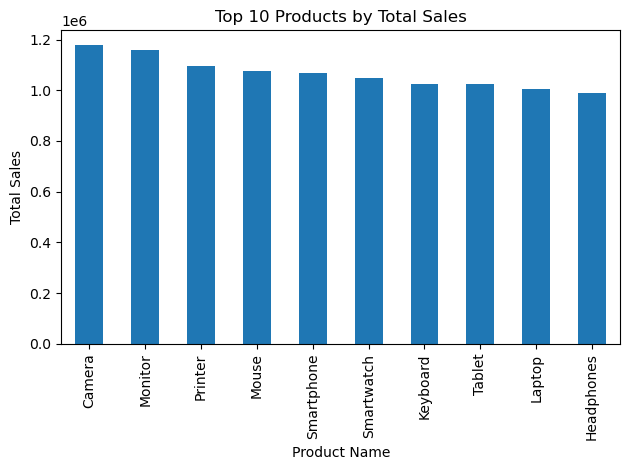

In [21]:
plt.figure()
top_products_sales.plot(kind="bar")
plt.title("Top 10 Products by Total Sales")
plt.xlabel("Product Name")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()


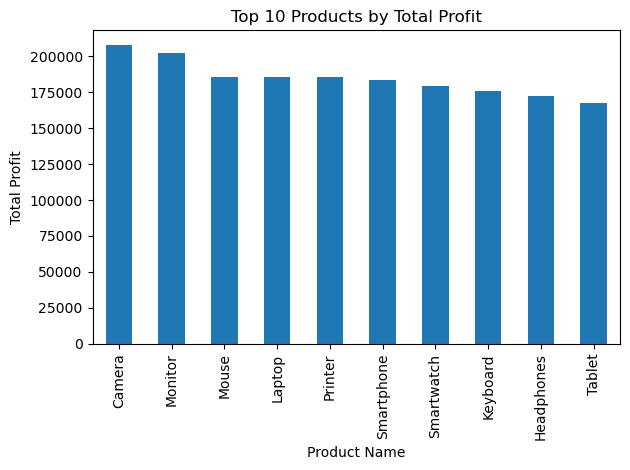

In [22]:
plt.figure()
top_products_profit.plot(kind="bar")
plt.title("Top 10 Products by Total Profit")
plt.xlabel("Product Name")
plt.ylabel("Total Profit")
plt.tight_layout()
plt.show()


# *Insights + Reflection*

## What I learned (my simple conclusions)

Here is what I noticed after exploring:

1) **Sales are not all the same size.** Some orders are small, but a few are very big.
2) **Some categories clearly make more sales** than others.
3) **Some regions make more profit** than others.
4) **Sales and profit move together most of the time.** Bigger sales usually means bigger profit.
5) **Monthly sales changes over time.** I can see some months are stronger.

If I had more time, I would want to investigate:
- Why some months are better than others
- Which category makes the best profit margin (not just sales)
- Whether some regions are better for certain products


## Dataset problems (things that seem imperfect)

Even if the dataset is clean, I still notice a few “data problems”:

- There is **no Order ID**. That makes it harder to track a specific order.
- Profit is **never negative**, which is unusual in real life (usually some sales lose money).
- There is **no customer info**, so I can’t study customer behavior.
- I don’t know the currency (Sales could be dollars, but it doesn’t say).

These are not “wrong”, but they limit what I can learn.


## Questions I would want to solve (if this was a real project)

If this was a real job, here are problems I would want to solve:

1) **Prediction idea:** Can I predict profit based on sales, category, region, and quantity?
2) **Business question:** Which category should the store focus on to grow faster?
3) **Operations question:** Which months need more inventory planning?
